# Reading the Data

The dataset for this problem is the ILPD (Indian Liver Patient Dataset) taken from the UCI Machine Learning Repository (URL https://archive.ics.uci.edu/ml/datasets/ILPD+(Indian+Liver+Patient+Dataset) ). The Number of instances that are in this dataset are in total of 583. It is a multivariate data set, containing 10 variables that are age, gender, total Bilirubin, Direct Bilirubin, Total Proteins, Albumin, A/G ratio, SGPT, SGOT and Alkphos. All values are real integers. This data set contains 416 liver patient records and 167 non liver patient records. The data set was collected from north east of Andhra Pradesh, India. Selector is a class label used to divide into groups(liver patient or not). This data set contains 441 male patient records and 142 female patient records. Any patient whose age exceeded 89 is listed as being of age "90".

In [1]:
import pandas as pd #dataframes
import numpy as np #numeral computing
import seaborn as sns #visualization
from matplotlib import pyplot as plt #visualization (scatter plots)
from sklearn.model_selection import train_test_split #splitting train and test datasets
from sklearn.metrics import roc_curve, auc, roc_auc_score, confusion_matrix #Display AUC-ROC graph and score

In [2]:
data = pd.read_csv(r"F:\A.P.U\Final Year Project\indian_liver_patient.csv")

In [3]:
data.head()

,Age,Gender,Total_Bilirubin,Direct_Bilirubin,Alkaline_Phosphotase,Alamine_Aminotransferase,Aspartate_Aminotransferase,Total_Protiens,Albumin,Albumin_and_Globulin_Ratio,Dataset
0,65,Female,0.7,0.1,187,16,18,6.8,3.3,0.90,1
1,62,Male,10.9,5.5,699,64,100,7.5,3.2,0.74,1
2,62,Male,7.3,4.1,490,60,68,7.0,3.3,0.89,1
3,58,Male,1.0,0.4,182,14,20,6.8,3.4,1.00,1
4,72,Male,3.9,2.0,195,27,59,7.3,2.4,0.40,1


In [4]:
data.sample(5)

,Age,Gender,Total_Bilirubin,Direct_Bilirubin,Alkaline_Phosphotase,Alamine_Aminotransferase,Aspartate_Aminotransferase,Total_Protiens,Albumin,Albumin_and_Globulin_Ratio,Dataset
71,75,Female,0.8,0.2,188,20,29,4.4,1.8,0.60,1
487,32,Male,0.7,0.2,276,102,190,6.0,2.9,0.93,1
360,24,Male,0.7,0.2,218,47,26,6.6,3.3,1.00,1
93,60,Male,5.8,2.7,204,220,400,7.0,3.0,0.70,1
393,41,Male,2.7,1.3,580,142,68,8.0,4.0,1.00,1


In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 583 entries, 0 to 582
Data columns (total 11 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   Age                         583 non-null    int64  
 1   Gender                      583 non-null    object 
 2   Total_Bilirubin             583 non-null    float64
 3   Direct_Bilirubin            583 non-null    float64
 4   Alkaline_Phosphotase        583 non-null    int64  
 5   Alamine_Aminotransferase    583 non-null    int64  
 6   Aspartate_Aminotransferase  583 non-null    int64  
 7   Total_Protiens              583 non-null    float64
 8   Albumin                     583 non-null    float64
 9   Albumin_and_Globulin_Ratio  583 non-null    float64
 10  Dataset                     583 non-null    int64  
dtypes: float64(5), int64(5), object(1)
memory usage: 50.2+ KB


In [6]:
info = ["Age of the patient","Gender of the patient","Total Bilirubin","Direct Bilirubin","Alkaline Phosphotase","Alamine Aminotransferase","Aspartate Aminotransferase","Total Protiens","Albumin","Albumin and Globulin Ratio","patient with liver disease, or no disease"]


for i in range(len(info)):
    print(data.columns[i]+":\t\t"+info[i])

Age:		Age of the patient
Gender:		Gender of the patient
Total_Bilirubin:		Total Bilirubin
Direct_Bilirubin:		Direct Bilirubin
Alkaline_Phosphotase:		Alkaline Phosphotase
Alamine_Aminotransferase:		Alamine Aminotransferase
Aspartate_Aminotransferase:		Aspartate Aminotransferase
Total_Protiens:		Total Protiens
Albumin:		Albumin
Albumin_and_Globulin_Ratio:		Albumin and Globulin Ratio
Dataset:		patient with liver disease, or no disease


# Removing Duplicates from the Dataset

In [7]:
data.shape # rows, columns of original dataset

(583, 11)

In [8]:
data_duplicate = data[data.duplicated(keep = False)] # keep = False gives you all rows with duplicate entries
data_duplicate

,Age,Gender,Total_Bilirubin,Direct_Bilirubin,Alkaline_Phosphotase,Alamine_Aminotransferase,Aspartate_Aminotransferase,Total_Protiens,Albumin,Albumin_and_Globulin_Ratio,Dataset
18,40,Female,0.9,0.3,293,232,245,6.8,3.1,0.80,1
19,40,Female,0.9,0.3,293,232,245,6.8,3.1,0.80,1
25,34,Male,4.1,2.0,289,875,731,5.0,2.7,1.10,1
26,34,Male,4.1,2.0,289,875,731,5.0,2.7,1.10,1
33,38,Female,2.6,1.2,410,59,57,5.6,3.0,0.80,2
34,38,Female,2.6,1.2,410,59,57,5.6,3.0,0.80,2
54,42,Male,8.9,4.5,272,31,61,5.8,2.0,0.50,1
55,42,Male,8.9,4.5,272,31,61,5.8,2.0,0.50,1
61,58,Male,1.0,0.5,158,37,43,7.2,3.6,1.00,1
62,58,Male,1.0,0.5,158,37,43,7.2,3.6,1.00,1


In [9]:
data = data[~data.duplicated(subset = None, keep = 'first')]
# Here, keep = 'first' ensures that only the first row is taken into the final dataset.
# The '~' sign tells pandas to keep all values except the 13 duplicate values
data.shape

(570, 11)

# Managing the Null Values in the Dataset

In [10]:
type(data)

pandas.core.frame.DataFrame

In [11]:
data.isnull().sum()

Age                           0
Gender                        0
Total_Bilirubin               0
Direct_Bilirubin              0
Alkaline_Phosphotase          0
Alamine_Aminotransferase      0
Aspartate_Aminotransferase    0
Total_Protiens                0
Albumin                       0
Albumin_and_Globulin_Ratio    0
Dataset                       0
dtype: int64

# Explotary Data Analysis

1    406
2    164
Name: Dataset, dtype: int64


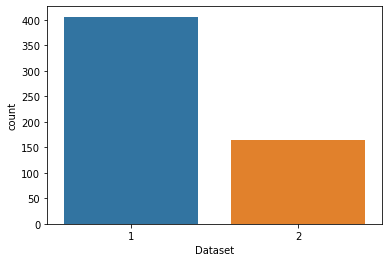

In [12]:
y = data["Dataset"]
sns.countplot(y)
target_temp = data.Dataset.value_counts()
print(target_temp)

<AxesSubplot:xlabel='Gender', ylabel='Dataset'>

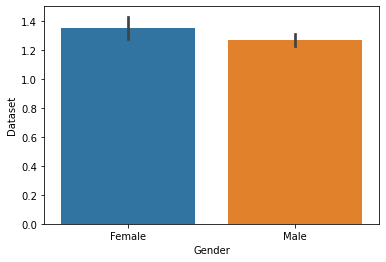

In [13]:
sns.barplot(data["Gender"],data["Dataset"])

# Female are more likely to suffer from liver disease than male

In [14]:
## if score==negative, mark 0 ;else 1 
def partition(x):
    if x == 2:
        return 0
    else:
        return 1

data['Dataset'] = data['Dataset'].map(partition)

1    406
0    164
Name: Dataset, dtype: int64


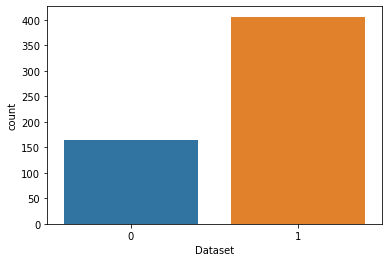

In [15]:
y = data["Dataset"]
sns.countplot(y)
target_temp = data.Dataset.value_counts()
print(target_temp)

In [16]:
data.dtypes[data.dtypes=='object']

Gender    object
dtype: object

array([[<AxesSubplot:title={'center':'Age'}>,
        <AxesSubplot:title={'center':'Total_Bilirubin'}>,
        <AxesSubplot:title={'center':'Direct_Bilirubin'}>],
       [<AxesSubplot:title={'center':'Alkaline_Phosphotase'}>,
        <AxesSubplot:title={'center':'Alamine_Aminotransferase'}>,
        <AxesSubplot:title={'center':'Aspartate_Aminotransferase'}>],
       [<AxesSubplot:title={'center':'Total_Protiens'}>,
        <AxesSubplot:title={'center':'Albumin'}>,
        <AxesSubplot:title={'center':'Albumin_and_Globulin_Ratio'}>],
       [<AxesSubplot:title={'center':'Dataset'}>, <AxesSubplot:>,
        <AxesSubplot:>]], dtype=object)

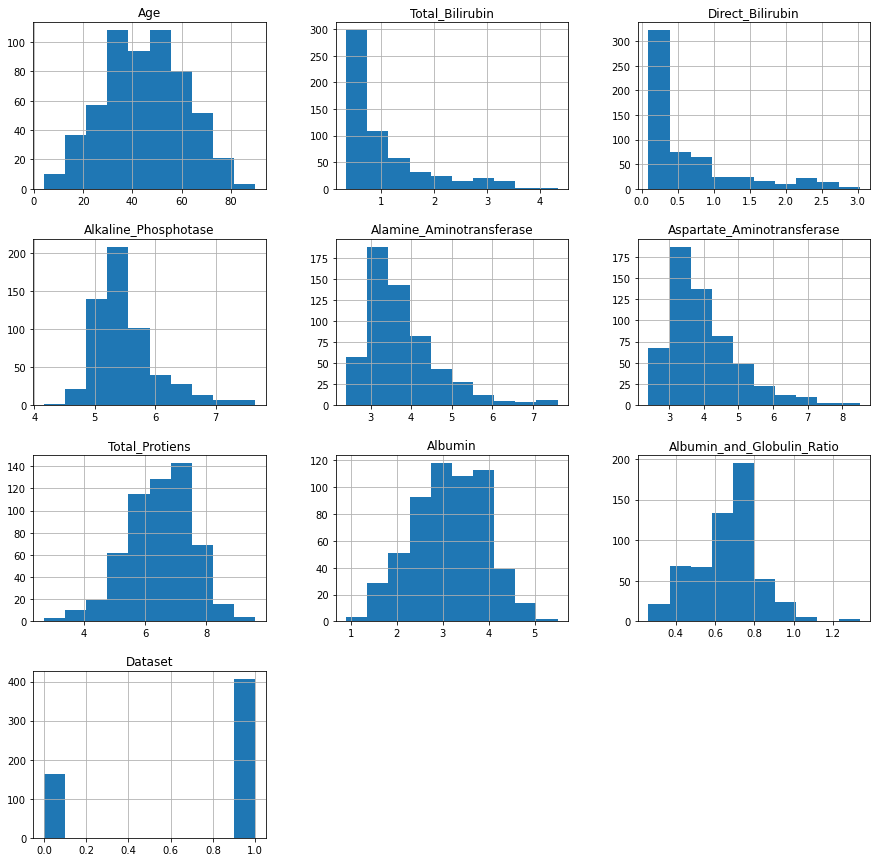

In [17]:
# Plot histogram grid
skewed = ['Total_Bilirubin', 'Direct_Bilirubin', 'Alkaline_Phosphotase', 'Alamine_Aminotransferase', 'Aspartate_Aminotransferase', 'Albumin_and_Globulin_Ratio']
features = pd.DataFrame(data = data)
features[skewed] = data[skewed].apply(lambda x: np.log(x + 1))
# Visualize the new log distributions
data.hist(figsize=(15,15))

In [18]:
data.describe()

,Age,Total_Bilirubin,Direct_Bilirubin,Alkaline_Phosphotase,Alamine_Aminotransferase,Aspartate_Aminotransferase,Total_Protiens,Albumin,Albumin_and_Globulin_Ratio,Dataset
count,570.000000,570.000000,570.000000,570.000000,570.000000,570.000000,570.000000,570.000000,570.000000,570.000000
mean,44.849123,1.054750,0.609359,5.499551,3.774517,3.973537,6.496316,3.148947,0.654700,0.712281
std,16.242182,0.742371,0.659892,0.530062,0.880264,0.981827,1.088300,0.796813,0.158912,0.453097
min,4.000000,0.336472,0.095310,4.158883,2.397895,2.397895,2.700000,0.900000,0.262364,0.000000
25%,33.000000,0.587787,0.182322,5.176150,3.178054,3.258097,5.800000,2.600000,0.530628,0.000000
50%,45.000000,0.693147,0.262364,5.342334,3.583519,3.737670,6.600000,3.100000,0.667829,1.000000
75%,58.000000,1.280934,0.832909,5.700444,4.110874,4.474480,7.200000,3.800000,0.741937,1.000000
max,90.000000,4.330733,3.030134,7.654917,7.601402,8.503094,9.600000,5.500000,1.335001,1.000000


In [19]:
data.describe(include=['object'])

,Gender
count,570
unique,2
top,Male
freq,430


In [20]:
#Scaling
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
numerical = ['Age', 'Total_Bilirubin', 'Direct_Bilirubin', 'Alkaline_Phosphotase', 'Alamine_Aminotransferase',
             'Aspartate_Aminotransferase', 'Total_Protiens', 'Albumin', 'Albumin_and_Globulin_Ratio']

data_transform = pd.DataFrame(data = features)
data_transform[numerical] = scaler.fit_transform(features[numerical])

display(data_transform.head(n = 5))

,Age,Gender,Total_Bilirubin,Direct_Bilirubin,Alkaline_Phosphotase,Alamine_Aminotransferase,Aspartate_Aminotransferase,Total_Protiens,Albumin,Albumin_and_Globulin_Ratio,Dataset
0,0.709302,Female,0.048609,0.000000,0.308223,0.083659,0.089521,0.594203,0.521739,0.353791,1
1,0.674419,Male,0.535785,0.605315,0.684260,0.341403,0.363170,0.695652,0.500000,0.271780,1
2,0.674419,Male,0.445585,0.522665,0.582821,0.329197,0.300762,0.623188,0.521739,0.348872,1
3,0.627907,Male,0.089297,0.082173,0.300513,0.059605,0.105914,0.594203,0.543478,0.401611,1
4,0.790698,Male,0.313641,0.341861,0.320143,0.179554,0.277870,0.666667,0.326087,0.069090,1


D:\anaconda3\lib\site-packages\seaborn\categorical.py:3666: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)


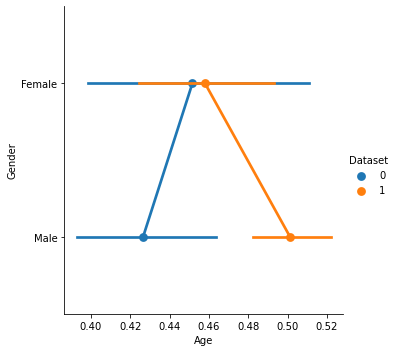

In [21]:
sns.factorplot (x="Age", y="Gender", hue="Dataset", data=data);

Age seems to be a factor for liver disease for both male and female genders

Females in the age of 42 till 50 are most likely to suffer liver disease, while for males have a range between the age of 48 and more

Number of patients that are male:  430
Number of patients that are female:  140


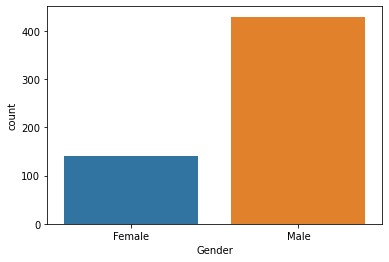

In [22]:
sns.countplot(data=data, x = 'Gender', label='Count')

M, F = data['Gender'].value_counts()
print('Number of patients that are male: ',M)
print('Number of patients that are female: ',F)

There are more males than females in the dataset

Converting the Gender into numerical values, males and females to 0 and 1

In [23]:
data['Gender'].replace(to_replace=['Male','Female'], value=[0,1],inplace=True)
data.head()

,Age,Gender,Total_Bilirubin,Direct_Bilirubin,Alkaline_Phosphotase,Alamine_Aminotransferase,Aspartate_Aminotransferase,Total_Protiens,Albumin,Albumin_and_Globulin_Ratio,Dataset
0,0.709302,1,0.048609,0.000000,0.308223,0.083659,0.089521,0.594203,0.521739,0.353791,1
1,0.674419,0,0.535785,0.605315,0.684260,0.341403,0.363170,0.695652,0.500000,0.271780,1
2,0.674419,0,0.445585,0.522665,0.582821,0.329197,0.300762,0.623188,0.521739,0.348872,1
3,0.627907,0,0.089297,0.082173,0.300513,0.059605,0.105914,0.594203,0.543478,0.401611,1
4,0.790698,0,0.313641,0.341861,0.320143,0.179554,0.277870,0.666667,0.326087,0.069090,1


# 2D Scatter Plots

Scatter plot for Direct Bilirubin and Total Bilirubin

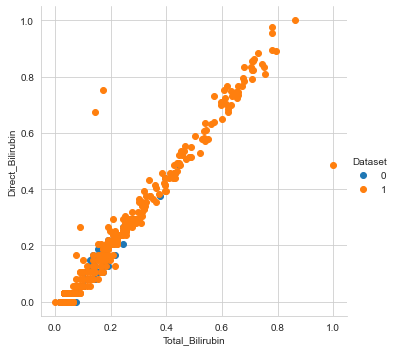

In [24]:
sns.set_style('whitegrid')   ## Background Grid
sns.FacetGrid(data, hue = 'Dataset', height = 5).map(plt.scatter, 'Total_Bilirubin', 'Direct_Bilirubin').add_legend()

Scatter plot for Albumin and Total Bilirubin

D:\anaconda3\lib\site-packages\seaborn\axisgrid.py:243: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


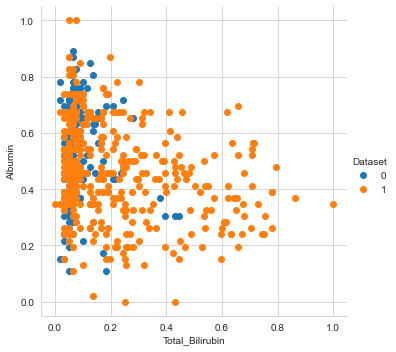

In [25]:
sns.set_style('whitegrid')   ## Background Grid
sns.FacetGrid(data, hue = 'Dataset', size = 5).map(plt.scatter, 'Total_Bilirubin', 'Albumin').add_legend()

Scatter plot for Albumin & Globulin Ratio and Total Proteins

D:\anaconda3\lib\site-packages\seaborn\axisgrid.py:243: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


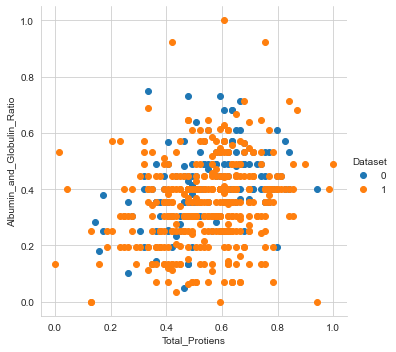

In [26]:
sns.set_style('whitegrid')   ## Background Grid
sns.FacetGrid(data, hue = 'Dataset', size = 5).map(plt.scatter, 'Total_Protiens', 'Albumin_and_Globulin_Ratio').add_legend()

# Correlations of variables between one another

In [27]:
data.corr()

,Age,Gender,Total_Bilirubin,Direct_Bilirubin,Alkaline_Phosphotase,Alamine_Aminotransferase,Aspartate_Aminotransferase,Total_Protiens,Albumin,Albumin_and_Globulin_Ratio,Dataset
Age,1.000000,-0.058237,0.070525,0.065632,0.069352,-0.079007,-0.031180,-0.197052,-0.271170,-0.229023,0.138093
Gender,-0.058237,1.000000,-0.158507,-0.160020,-0.025452,-0.170008,-0.184981,0.085895,0.091369,0.016545,-0.078501
Total_Bilirubin,0.070525,-0.158507,1.000000,0.974863,0.347042,0.438496,0.534824,-0.045697,-0.292082,-0.313942,0.309298
Direct_Bilirubin,0.065632,-0.160020,0.974863,1.000000,0.346357,0.428902,0.529067,-0.033507,-0.281609,-0.305363,0.312174
Alkaline_Phosphotase,0.069352,-0.025452,0.347042,0.346357,1.000000,0.340468,0.318850,-0.001003,-0.174067,-0.298037,0.234744
Alamine_Aminotransferase,-0.079007,-0.170008,0.438496,0.428902,0.340468,1.000000,0.841198,-0.004560,-0.042939,-0.072553,0.286356
Aspartate_Aminotransferase,-0.031180,-0.184981,0.534824,0.529067,0.318850,0.841198,1.000000,-0.052380,-0.174324,-0.171987,0.302103
Total_Protiens,-0.197052,0.085895,-0.045697,-0.033507,-0.001003,-0.004560,-0.052380,1.000000,0.784731,0.250186,-0.037794
Albumin,-0.271170,0.091369,-0.292082,-0.281609,-0.174067,-0.042939,-0.174324,0.784731,1.000000,0.727622,-0.166835
Albumin_and_Globulin_Ratio,-0.229023,0.016545,-0.313942,-0.305363,-0.298037,-0.072553,-0.171987,0.250186,0.727622,1.000000,-0.185379


Correlations shows the relationship between a numeric feature with another. It has a value between -1 and 1 that represents how closely two values are.

Positive correlation indicate the extent to which those variables either increases or decreases in parallel.

Negative correlation indicate the extent to which one variable increases and the other one decreases.

Should the value goes exactly 0, it means it has no relationship at all.


<AxesSubplot:>

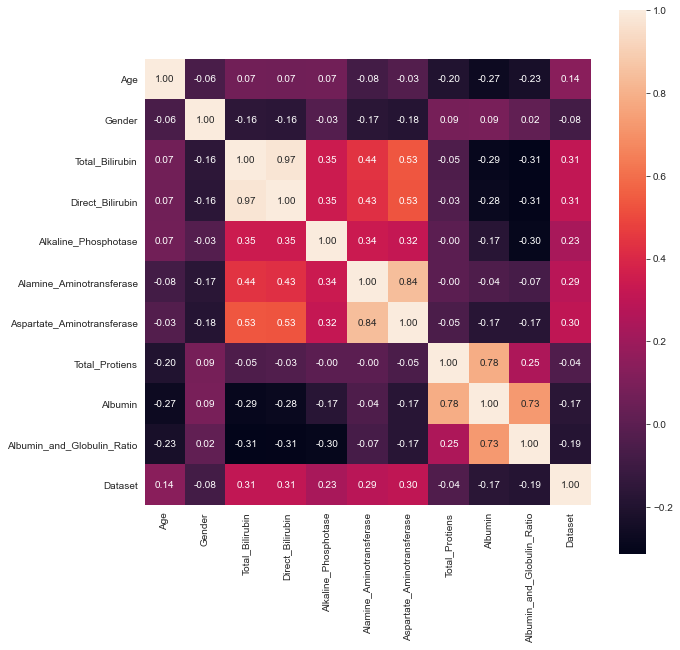

In [28]:
plt.figure(figsize=(10,10))
sns.heatmap(data.corr(), cbar = True, square = True, annot=True, fmt= '.2f', annot_kws={'size': 10})

# Machine Learning Models

## Data Preparation

In [29]:
# Create separate object for target variable
y = data.Dataset

# Create separate object for input features
X = data.drop('Dataset', axis=1)

In [30]:
# Split X and y into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                    test_size=0.2, 
                                                    random_state=1234,
                                                    stratify=data.Dataset)

In [31]:
# Print number of observations in X_train, X_test, y_train, and y_test
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(456, 10) (114, 10) (456,) (114,)


1    406
0    164
Name: Dataset, dtype: int64


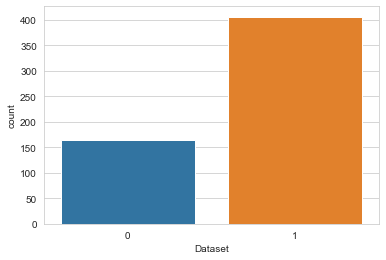

In [32]:
ax=sns.countplot(x='Dataset',data=data)
print(data['Dataset'].value_counts())

## Undersampling data

In [33]:
#minority_class_len = len(data[data['Dataset'] == 0])
#print(minority_class_len)

In [34]:
#majority_class_indices = data[data['Dataset'] == 1].index
#print(majority_class_indices)

In [35]:
#random_majority_indices = np.random.choice(majority_class_indices,minority_class_len,replace=False)
#print(len(random_majority_indices))

In [36]:
#minority_class_indices = data[data['Dataset'] == 0].index
#print(minority_class_indices)

In [37]:
#under_sample_indices=np.concatenate([minority_class_indices,random_majority_indices])

In [38]:
#under_sample=data.loc[under_sample_indices]

In [39]:
#sns.countplot(x='Dataset',data=under_sample)

In [40]:
#X = under_sample.loc[:, data.columns!='Dataset']
#y = under_sample.loc[:, data.columns=='Dataset']
#X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

## Oversampling data

In [41]:
majority_class_len = len(data[data['Dataset'] == 1])
print(majority_class_len)

406


In [42]:
minority_class_indices = data[data['Dataset'] == 0].index
print(minority_class_indices)

Int64Index([  8,  12,  15,  17,  24,  28,  29,  32,  33,  36,
            ...
            539, 540, 541, 542, 545, 551, 564, 566, 578, 582],
           dtype='int64', length=164)


In [43]:
random_minority_indices = np.random.choice(minority_class_indices,
                                          majority_class_len,
                                          replace=True)
print(len(random_minority_indices))

406


In [44]:
majority_class_indices = data[data['Dataset'] == 1].index
print(majority_class_indices)

Int64Index([  0,   1,   2,   3,   4,   5,   6,   7,   9,  10,
            ...
            571, 572, 573, 574, 575, 576, 577, 579, 580, 581],
           dtype='int64', length=406)


In [45]:
over_sample_indices=np.concatenate([majority_class_indices,random_minority_indices])

In [46]:
over_sample=data.loc[over_sample_indices]

<AxesSubplot:xlabel='Dataset', ylabel='count'>

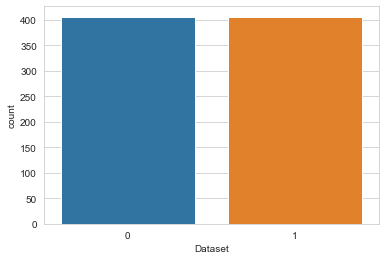

In [47]:
sns.countplot(x='Dataset',data=over_sample)

In [48]:
X = over_sample.loc[:, data.columns!='Dataset']
y = over_sample.loc[:, data.columns=='Dataset']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

## 1. Decision Tree

In [49]:
def ConfusionMatrixToDataFrame (actual, predicted):
    tn, fp, fn, tp = confusion_matrix(actual, predicted).ravel()
    values = {'positive':{'true': tp, 'false': fp}, 'negative':{'true': tn, 'false': fn}}
    output_cm = pd.DataFrame(columns = ["true", "false"])
    for key, value in values.items():
        output_cm = output_cm.append(pd.Series(value, name = key))
    return output_cm

In [50]:
from sklearn.tree import DecisionTreeClassifier #Decision Tree
from sklearn import tree #Decision Tree
from sklearn.metrics import accuracy_score, recall_score, precision_score, f1_score #Accuracy score
from sklearn.model_selection import RandomizedSearchCV # Perform hyperparameter tuning
tuned_params = {'min_samples_split': [2, 3, 4, 5, 7], 'min_samples_leaf': [1, 2, 3, 4, 6], 'max_depth': [2, 3, 4, 5, 6, 7]}
model = RandomizedSearchCV(DecisionTreeClassifier(), tuned_params, n_iter=15, scoring = 'roc_auc', n_jobs=-1)
model.fit(X_train, y_train)

RandomizedSearchCV(estimator=DecisionTreeClassifier(), n_iter=15, n_jobs=-1,
                   param_distributions={'max_depth': [2, 3, 4, 5, 6, 7],
                                        'min_samples_leaf': [1, 2, 3, 4, 6],
                                        'min_samples_split': [2, 3, 4, 5, 7]},
                   scoring='roc_auc')

In [51]:
DTmodel = model.best_estimator_
DTmodel

DecisionTreeClassifier(max_depth=6, min_samples_leaf=3)

In [100]:
DT_y_train_preds = model.predict(X_train)
print("Accuracy on training set: ", accuracy_score(DT_y_train_preds, y_train),"\n")

print("Precision on training set: ", precision_score(DT_y_train_preds, y_train),"\n")

print("Recall on training set: ", recall_score(DT_y_train_preds, y_train),"\n")

print("F1 score on training set: ", f1_score(DT_y_train_preds, y_train),"\n")

DT_y_test_preds = model.predict(X_test)

DT_accuracy = accuracy_score(DT_y_test_preds, y_test)

print("Accuracy on testing set: ", DT_accuracy,"\n")

print("Precision on testing set: ", precision_score(DT_y_test_preds, y_test),"\n")

print("Recall on testing set: ", recall_score(DT_y_test_preds, y_test),"\n")

print("F1 score on testing set: ", f1_score(DT_y_test_preds, y_test),"\n")

Accuracy on training set:  0.9393382352941176 

Precision on training set:  0.898876404494382 

Recall on training set:  0.975609756097561 

F1 score on training set:  0.935672514619883 

Accuracy on testing set:  0.7835820895522388 

Precision on testing set:  0.6690647482014388 

Recall on testing set:  0.8857142857142857 

F1 score on testing set:  0.7622950819672131 



In [53]:
from sklearn.model_selection import StratifiedKFold #Cross Validation
cv = StratifiedKFold(n_splits=3)

In [54]:
from sklearn.model_selection import cross_val_score #Cross Validation
crossDT = cross_val_score(DTmodel,X,y,cv=cv,scoring = "accuracy")
print(crossDT)
np.mean(crossDT)

[0.73800738 0.62361624 0.72962963]


0.6970844152885972

In [55]:
DT_y_pred_proba = model.predict_proba(X_test)[:,1]
DT_y_pred_proba[:10]

array([0.24669604, 0.24669604, 1.        , 0.9375    , 0.24669604,
       0.24669604, 0.64285714, 0.24669604, 0.64285714, 0.24669604])

In [56]:
confusion_matrix(y_test, DT_y_test_preds)

array([[116,  13],
       [ 53,  86]], dtype=int64)

In [57]:
from sklearn.metrics import classification_report
print(classification_report(y_train, DT_y_train_preds))
print(classification_report(y_test,DT_y_test_preds))

              precision    recall  f1-score   support

           0       0.73      0.96      0.83       277
           1       0.94      0.64      0.76       267

    accuracy                           0.80       544
   macro avg       0.84      0.80      0.80       544
weighted avg       0.83      0.80      0.80       544

              precision    recall  f1-score   support

           0       0.69      0.90      0.78       129
           1       0.87      0.62      0.72       139

    accuracy                           0.75       268
   macro avg       0.78      0.76      0.75       268
weighted avg       0.78      0.75      0.75       268



In [58]:
fpr, tpr, thresholds = roc_curve(y_test, DT_y_pred_proba)

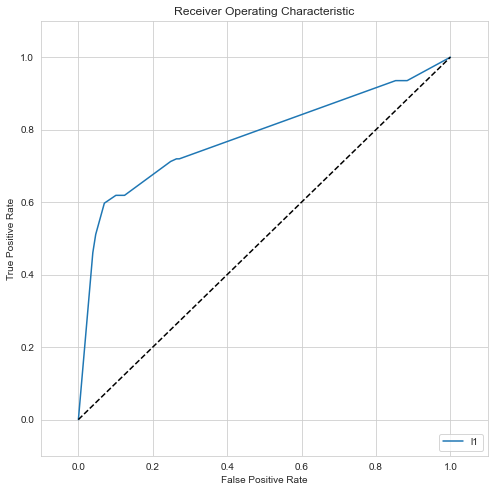

In [59]:
# Plot the ROC curve
fig = plt.figure(figsize=(8,8))
plt.title('Receiver Operating Characteristic')

# Plot ROC curve
plt.plot(fpr, tpr, label='l1')
plt.legend(loc='lower right')

# Diagonal 45 degree line
plt.plot([0,1],[0,1],'k--')

# Axes limits and labels
plt.xlim([-0.1,1.1])
plt.ylim([-0.1,1.1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

In [60]:
# Calculate AUC for Train
roc_auc_score(y_train, DT_y_train_preds)

0.7984964642572236

In [61]:
# Calculate AUC for Test set
DT_auc = auc(fpr, tpr)
print(DT_auc)

0.7805476548993364


### Feature Importance

In [62]:
indices = np.argsort(-model.best_estimator_.feature_importances_)
print("The features in order of importance are:")
print(50*'-')
for feature in X.columns[indices]:
    print(feature)

The features in order of importance are:
--------------------------------------------------
Direct_Bilirubin
Alamine_Aminotransferase
Age
Alkaline_Phosphotase
Aspartate_Aminotransferase
Albumin
Total_Protiens
Albumin_and_Globulin_Ratio
Gender
Total_Bilirubin


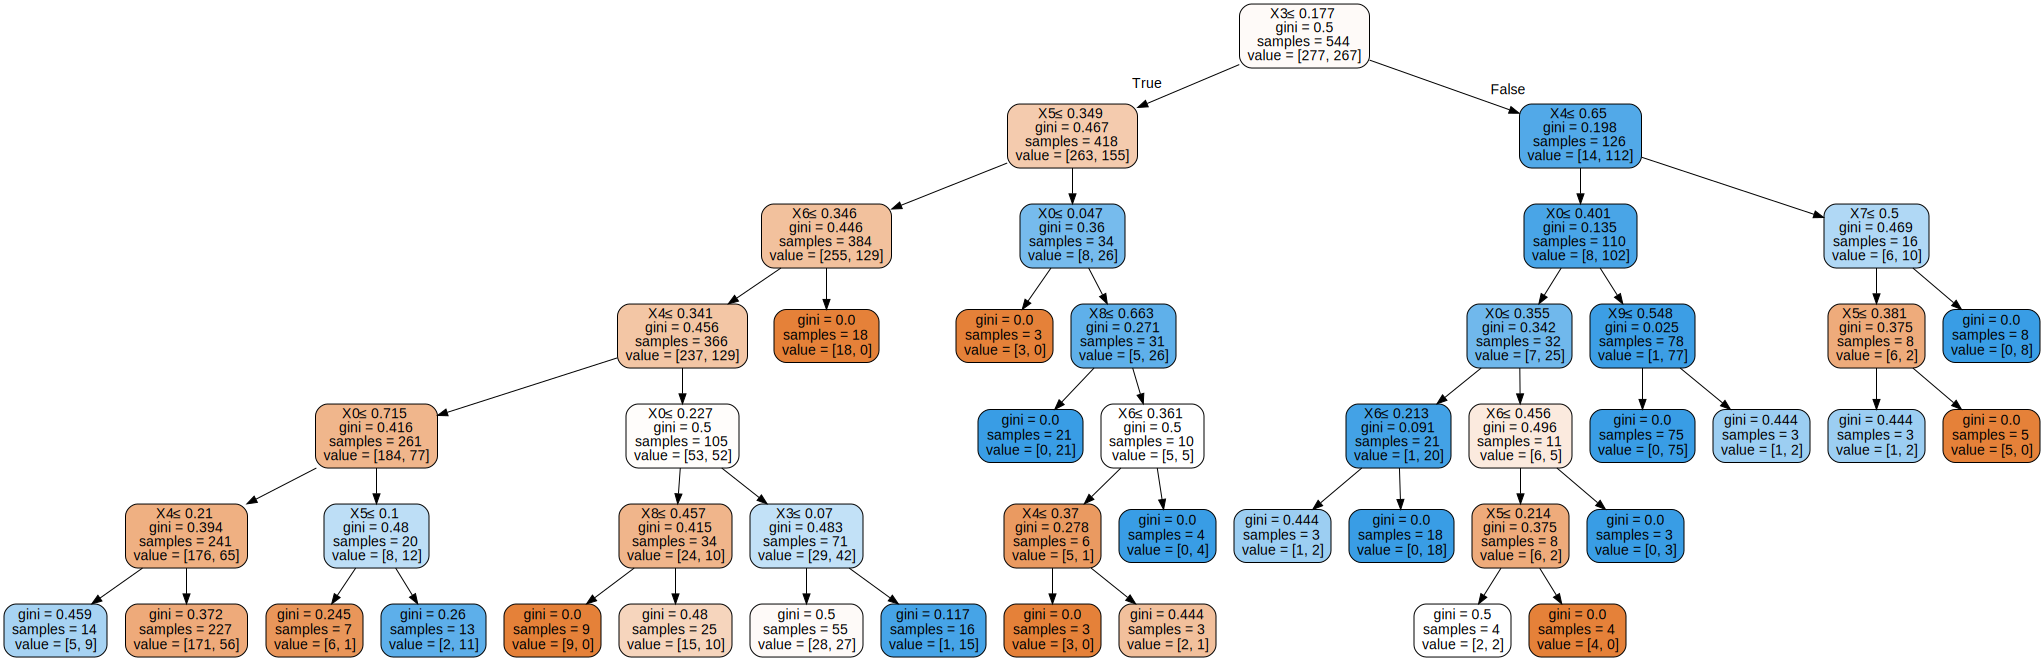

In [63]:
!pip install graphviz
import graphviz
import os
os.environ["PATH"] += os.pathsep + r"D:\anaconda3\Library\bin\graphviz"
#from sklearn.externals.six import StringIO  
from IPython.display import Image  
from sklearn.tree import export_graphviz
from sklearn import tree
import pydotplus
dot_data = tree.export_graphviz(DTmodel, out_file=None,  
                 filled=True, rounded=True,
                 special_characters=True)
#graph = pydotplus.graph_from_dot_data(dot_data.getvalue()) 
graph = graphviz.Source(dot_data)
graph
# In case an image needs to be export
#graph.format = "png"
#graph.render("Liver Decision Tree")

## 2. Logistic Regression

In [64]:
from sklearn.linear_model import LogisticRegression
tuned_params = {'C': [0.0001, 0.001, 0.01, 0.1, 1, 10, 100, 1000, 10000], 'penalty': ['l1', 'l2']}
model = RandomizedSearchCV(LogisticRegression(), tuned_params,n_iter=15, scoring = 'roc_auc', n_jobs=-1)
model.fit(X_train, y_train)

D:\anaconda3\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


RandomizedSearchCV(estimator=LogisticRegression(), n_iter=15, n_jobs=-1,
                   param_distributions={'C': [0.0001, 0.001, 0.01, 0.1, 1, 10,
                                              100, 1000, 10000],
                                        'penalty': ['l1', 'l2']},
                   scoring='roc_auc')

In [65]:
LRmodel = model.best_estimator_
LRmodel

LogisticRegression(C=10000)

In [66]:
LR_y_train_preds = model.predict(X_train)
print("Accuracy on training set: ", accuracy_score(LR_y_train_preds, y_train),"\n")

print("Precision on training set: ", precision_score(LR_y_train_preds, y_train),"\n")

print("Recall on training set: ", recall_score(LR_y_train_preds, y_train),"\n")

print("F1 score on training set: ", f1_score(LR_y_train_preds, y_train),"\n")

LR_y_test_preds = model.predict(X_test)

LR_accuracy =  accuracy_score(LR_y_test_preds, y_test)

print("Accuracy on testing set: ", LR_accuracy,"\n")

print("Precision on testing set: ", precision_score(LR_y_test_preds, y_test),"\n")

print("Recall on testing set: ", recall_score(LR_y_test_preds, y_test),"\n")

print("F1 score on testing set: ", f1_score(LR_y_test_preds, y_test),"\n")

Accuracy on training set:  0.6985294117647058 

Precision on training set:  0.5580524344569289 

Recall on training set:  0.764102564102564 

F1 score on training set:  0.6450216450216449 

Accuracy on testing set:  0.6940298507462687 

Precision on testing set:  0.5827338129496403 

Recall on testing set:  0.7714285714285715 

F1 score on testing set:  0.6639344262295083 



In [67]:
print(classification_report(y_train, LR_y_train_preds))
print(classification_report(y_test,LR_y_test_preds))

              precision    recall  f1-score   support

           0       0.66      0.83      0.74       277
           1       0.76      0.56      0.65       267

    accuracy                           0.70       544
   macro avg       0.71      0.70      0.69       544
weighted avg       0.71      0.70      0.69       544

              precision    recall  f1-score   support

           0       0.64      0.81      0.72       129
           1       0.77      0.58      0.66       139

    accuracy                           0.69       268
   macro avg       0.71      0.70      0.69       268
weighted avg       0.71      0.69      0.69       268



In [68]:
crossLR = cross_val_score(LRmodel,X,y,cv=cv,scoring = "accuracy")
print(crossLR)
np.mean(crossLR)

D:\anaconda3\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


[0.70479705 0.56457565 0.71851852]


D:\anaconda3\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
D:\anaconda3\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


0.6626304040818186

In [69]:
LRy_test_prob = model.predict_proba(X_test)[:,1]
LRy_test_prob [:10]

array([0.26873016, 0.55592704, 0.59690046, 0.50582829, 0.24399046,
       0.22669742, 0.47654319, 0.21910042, 0.23252324, 0.41248595])

In [70]:
ConfusionMatrixToDataFrame(y_test,LR_y_test_preds)

,true,false
positive,81,24
negative,105,58


In [71]:
# Calculate ROC curve from y_test and pred
fpr, tpr, thresholds = roc_curve(y_test, LRy_test_prob)

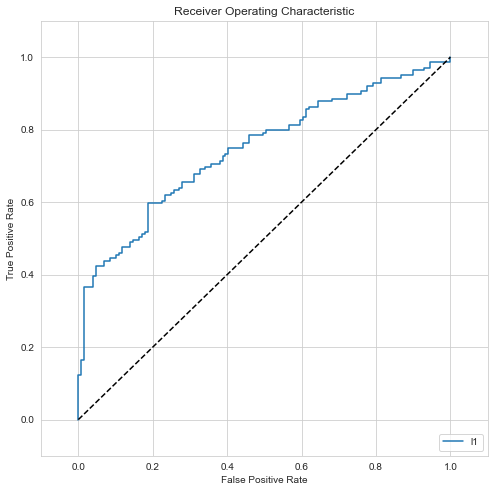

In [72]:
# Plot the ROC curve
fig = plt.figure(figsize=(8,8))
plt.title('Receiver Operating Characteristic')

# Plot ROC curve
plt.plot(fpr, tpr, label='l1')
plt.legend(loc='lower right')

# Diagonal 45 degree line
plt.plot([0,1],[0,1],'k--')

# Axes limits and labels
plt.xlim([-0.1,1.1])
plt.ylim([-0.1,1.1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

In [73]:
# Calculate AUC for Train set
print(roc_auc_score(y_test,LR_y_test_preds))

0.6983436506608666


In [74]:
# Calculate AUC for Test set
LR_auc = auc(fpr, tpr)
print(LR_auc)

0.7453014332719871


### Feature Importance

In [75]:
indices = np.argsort(-abs(LRmodel.coef_[0,:]))
print("The features in order of importance are:")
print(50*'-')
for feature in X.columns[indices]:
    print(feature)

The features in order of importance are:
--------------------------------------------------
Albumin
Total_Protiens
Direct_Bilirubin
Albumin_and_Globulin_Ratio
Total_Bilirubin
Alamine_Aminotransferase
Age
Alkaline_Phosphotase
Aspartate_Aminotransferase
Gender


## 3. Random Forest

In [76]:
from sklearn.ensemble import RandomForestClassifier
tuned_params = {'n_estimators':[3,10,15],'max_depth':[3,10,15], 'max_features':['auto',None], 'min_samples_split': [2, 5, 10], 'min_samples_leaf': [1, 2, 4]}
model = RandomizedSearchCV(RandomForestClassifier(), tuned_params, n_iter=15, scoring = 'roc_auc', n_jobs=-1)
model.fit(X_train, y_train)

D:\anaconda3\lib\site-packages\sklearn\model_selection\_search.py:765: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self.best_estimator_.fit(X, y, **fit_params)


RandomizedSearchCV(estimator=RandomForestClassifier(), n_iter=15, n_jobs=-1,
                   param_distributions={'max_depth': [3, 10, 15],
                                        'max_features': ['auto', None],
                                        'min_samples_leaf': [1, 2, 4],
                                        'min_samples_split': [2, 5, 10],
                                        'n_estimators': [3, 10, 15]},
                   scoring='roc_auc')

In [77]:
RFmodel = model.best_estimator_
RFmodel

RandomForestClassifier(max_depth=15, max_features=None, min_samples_leaf=2,
                       min_samples_split=5, n_estimators=15)

In [78]:
RF_y_train_preds = model.predict(X_train)
print("Accuracy on training set: ", accuracy_score(RF_y_train_preds, y_train),"\n")

print("Precision on training set: ", precision_score(RF_y_train_preds, y_train),"\n")

print("Recall on training set: ", recall_score(RF_y_train_preds, y_train),"\n")

print("F1 score on training set: ", f1_score(RF_y_train_preds, y_train),"\n")

RF_y_test_preds = model.predict(X_test)

RF_accuracy = accuracy_score(RF_y_test_preds, y_test)

print("Accuracy on testing set: ", RF_accuracy,"\n")

print("Precision on testing set: ", precision_score(RF_y_test_preds, y_test),"\n")

print("Recall on testing set: ", recall_score(RF_y_test_preds, y_test),"\n")

print("F1 score on testing set: ", f1_score(RF_y_test_preds, y_test),"\n")

Accuracy on training set:  0.9797794117647058 

Precision on training set:  0.9812734082397003 

Recall on training set:  0.9776119402985075 

F1 score on training set:  0.9794392523364486 

Accuracy on testing set:  0.7835820895522388 

Precision on testing set:  0.697841726618705 

Recall on testing set:  0.8584070796460177 

F1 score on testing set:  0.7698412698412699 



In [79]:
print(classification_report(y_train, RF_y_train_preds))
print(classification_report(y_test,RF_y_test_preds))

              precision    recall  f1-score   support

           0       0.98      0.98      0.98       277
           1       0.98      0.98      0.98       267

    accuracy                           0.98       544
   macro avg       0.98      0.98      0.98       544
weighted avg       0.98      0.98      0.98       544

              precision    recall  f1-score   support

           0       0.73      0.88      0.80       129
           1       0.86      0.70      0.77       139

    accuracy                           0.78       268
   macro avg       0.79      0.79      0.78       268
weighted avg       0.80      0.78      0.78       268



In [80]:
crossRF = cross_val_score(RFmodel,X,y,cv=cv,scoring = "accuracy")
print(crossRF)
np.mean(crossRF)

D:\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
D:\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
D:\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[0.82656827 0.7195572  0.81481481]


0.7869800920231426

In [81]:
RFy_test_prob = model.predict_proba(X_test)[:,1]
RFy_test_prob [:10]

array([0.34333333, 0.06161616, 0.50666667, 0.63298653, 0.33444444,
       0.39729037, 0.74      , 0.61454311, 0.59444444, 0.20846154])

In [82]:
ConfusionMatrixToDataFrame(y_test,RF_y_test_preds)

,true,false
positive,97,16
negative,113,42


In [83]:
# Calculate ROC curve from y_test and pred
fpr, tpr, thresholds = roc_curve(y_test, RFy_test_prob)

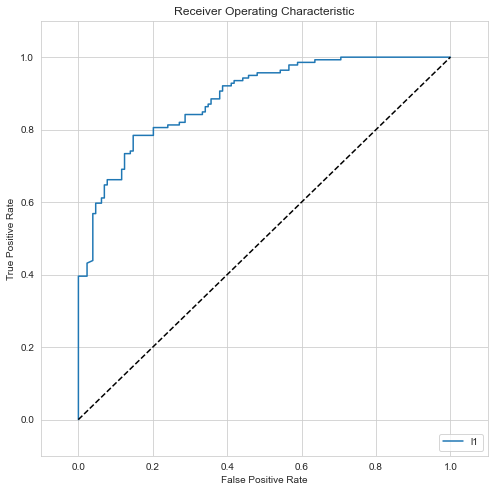

In [84]:
# Plot the ROC curve
fig = plt.figure(figsize=(8,8))
plt.title('Receiver Operating Characteristic')

# Plot ROC curve
plt.plot(fpr, tpr, label='l1')
plt.legend(loc='lower right')

# Diagonal 45 degree line
plt.plot([0,1],[0,1],'k--')

# Axes limits and labels
plt.xlim([-0.1,1.1])
plt.ylim([-0.1,1.1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

In [85]:
# Calculate AUC for Train set
print(roc_auc_score(y_test,RF_y_test_preds))

0.7869053594333836


In [86]:
# Calculate AUC for Test set
RF_auc = auc(fpr, tpr)
print(RF_auc)

0.8872343985276895


## Feature Importance

In [87]:
indices = np.argsort(-RFmodel.feature_importances_)
print("The features in order of importance are:")
print(50*'-')
for feature in X.columns[indices]:
    print(feature)

The features in order of importance are:
--------------------------------------------------
Direct_Bilirubin
Alkaline_Phosphotase
Age
Alamine_Aminotransferase
Aspartate_Aminotransferase
Total_Protiens
Albumin
Albumin_and_Globulin_Ratio
Total_Bilirubin
Gender


## 4. Support Vector Machine

In [88]:
from sklearn import svm
from sklearn.svm import SVC
tuned_params = {'kernel':['poly','rbf','linear'], 'C':[0.001,1,1000],'probability':[True]}
model = RandomizedSearchCV(svm.SVC(), tuned_params, n_iter=9, scoring = 'roc_auc', n_jobs=-1)
model.fit(X_train, y_train)

D:\anaconda3\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


RandomizedSearchCV(estimator=SVC(), n_iter=9, n_jobs=-1,
                   param_distributions={'C': [0.001, 1, 1000],
                                        'kernel': ['poly', 'rbf', 'linear'],
                                        'probability': [True]},
                   scoring='roc_auc')

In [89]:
SVCmodel = model.best_estimator_
SVCmodel

SVC(C=1000, probability=True)

In [90]:
SVC_y_train_preds = model.predict(X_train)
print("Accuracy on training set: ", accuracy_score(SVC_y_train_preds, y_train),"\n")

print("Precision on training set: ", precision_score(SVC_y_train_preds, y_train),"\n")

print("Recall on training set: ", recall_score(SVC_y_train_preds, y_train),"\n")

print("F1 score on training set: ", f1_score(SVC_y_train_preds, y_train),"\n")

SVC_y_test_preds = model.predict(X_test)

SVC_accuracy = accuracy_score(SVC_y_test_preds, y_test)

print("Accuracy on testing set: ", SVC_accuracy ,"\n")

print("Precision on testing set: ", precision_score(SVC_y_test_preds, y_test),"\n")

print("Recall on testing set: ", recall_score(SVC_y_test_preds, y_test),"\n")

print("F1 score on testing set: ", f1_score(SVC_y_test_preds, y_test),"\n")

Accuracy on training set:  0.9393382352941176 

Precision on training set:  0.898876404494382 

Recall on training set:  0.975609756097561 

F1 score on training set:  0.935672514619883 

Accuracy on testing set:  0.7835820895522388 

Precision on testing set:  0.6690647482014388 

Recall on testing set:  0.8857142857142857 

F1 score on testing set:  0.7622950819672131 



In [91]:
print(classification_report(y_train, SVC_y_train_preds))
print(classification_report(y_test,SVC_y_test_preds))

              precision    recall  f1-score   support

           0       0.91      0.98      0.94       277
           1       0.98      0.90      0.94       267

    accuracy                           0.94       544
   macro avg       0.94      0.94      0.94       544
weighted avg       0.94      0.94      0.94       544

              precision    recall  f1-score   support

           0       0.72      0.91      0.80       129
           1       0.89      0.67      0.76       139

    accuracy                           0.78       268
   macro avg       0.80      0.79      0.78       268
weighted avg       0.80      0.78      0.78       268



In [92]:
crossSVC = cross_val_score(SVCmodel,X,y,cv=cv,scoring = "accuracy")
print(crossSVC)
np.mean(crossSVC)

D:\anaconda3\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
D:\anaconda3\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
D:\anaconda3\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


[0.74169742 0.76383764 0.77777778]


0.7611042777094438

In [93]:
SVC_y_test_prob = model.predict_proba(X_test)[:,1]
SVC_y_test_prob [:10]

array([0.40389076, 0.39775524, 0.47719195, 0.51506521, 0.39594868,
       0.31797863, 0.58640525, 0.42710117, 0.29288671, 0.37102522])

In [94]:
ConfusionMatrixToDataFrame(y_test,SVC_y_test_preds)

,true,false
positive,93,12
negative,117,46


In [95]:
# Calculate ROC curve from y_test and pred
fpr, tpr, thresholds = roc_curve(y_test, SVC_y_test_prob)

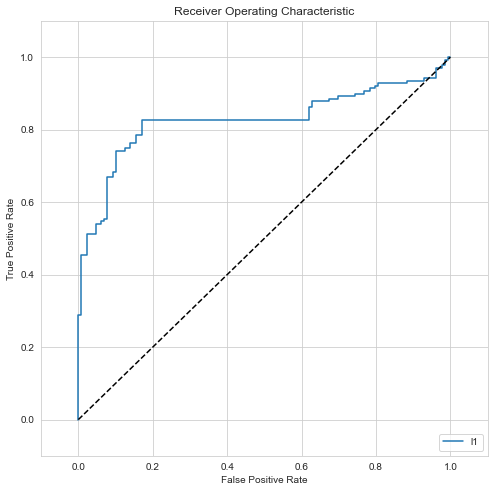

In [96]:
# Plot the ROC curve
fig = plt.figure(figsize=(8,8))
plt.title('Receiver Operating Characteristic')

# Plot ROC curve
plt.plot(fpr, tpr, label='l1')
plt.legend(loc='lower right')

# Diagonal 45 degree line
plt.plot([0,1],[0,1],'k--')

# Axes limits and labels
plt.xlim([-0.1,1.1])
plt.ylim([-0.1,1.1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

In [97]:
# Calculate AUC for Train set
print(roc_auc_score(y_test,SVC_y_test_preds))

0.7880207461937426


In [98]:
# Calculate AUC for Test set
SVC_auc= auc(fpr, tpr)
print(SVC_auc)

0.8271150521443309


# Accuracy Report 

Below is a report on accuracy and AUC score of each model

In [101]:
accuracyScore = [DT_accuracy, LR_accuracy, RF_accuracy, SVC_accuracy]
aucScore = [DT_auc, LR_auc, RF_auc, SVC_auc]

accuracyReport = pd.DataFrame(accuracyScore, index=['Decision Tree','Logistic Regression','Random Forest','SVM'])
accuracyReport.columns = ['Accuracy Score']
accuracyReport.insert(loc=1, column='AUC SCORE',value=aucScore)
accuracyReport.columns.name = 'Algorithm'
accuracyReport

Algorithm,Accuracy Score,AUC SCORE
Decision Tree,0.783582,0.780548
Logistic Regression,0.694030,0.745301
Random Forest,0.783582,0.887234
SVM,0.783582,0.827115


The accuracy report shows the performance of each algorithm on test data

## Saving the winning model 

In [102]:
import joblib

In [104]:
win_model = RFmodel
win_model.fit(X_train, y_train)
with open('LiverDisease.pkl', 'wb') as pickle_file:
      joblib.dump(win_model, 'LiverDisease.pkl')

D:\anaconda3\lib\site-packages\ipykernel_launcher.py:2: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  
